In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
nba_data = pd.read_csv('/Users/xhoishyti/School/dsc_680/week2/all_games.csv')

required_columns = ['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'GAME_DATE']
nba_data = nba_data.dropna(subset=required_columns)
nba_data['WL'] = nba_data['WL'].replace({'L': 0, 'W': 1})

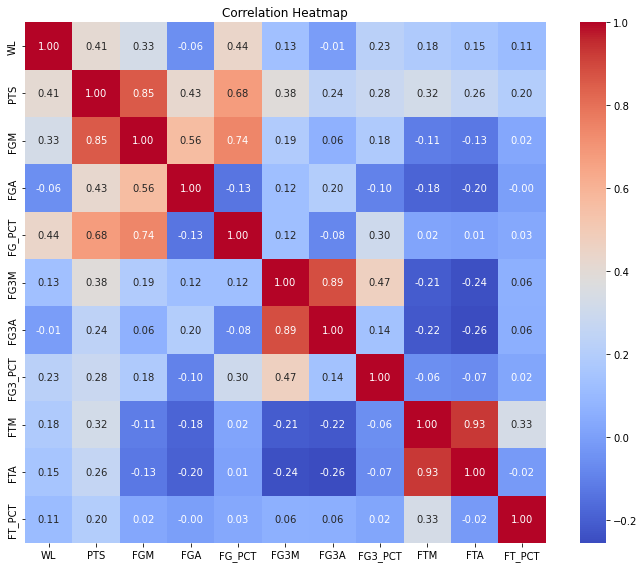

In [14]:
nba_data_subset = nba_data[['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']].copy()
correlation_matrix = nba_data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


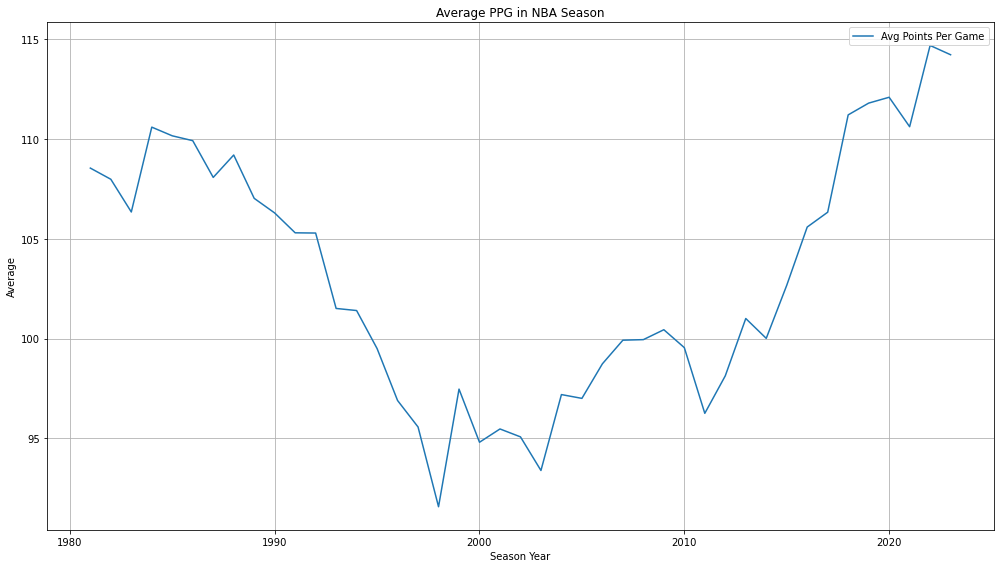

In [24]:
# Convert GAME_DATE to datetime for time-based analysis
nba_data['GAME_DATE'] = pd.to_datetime(nba_data['GAME_DATE'], errors='coerce')

# Extract season year from SEASON_ID (last 2 digits typically represent the ending year of the season)
nba_data['SEASON_YEAR'] = nba_data['SEASON_ID'] % 100 + 1900
nba_data.loc[nba_data['SEASON_YEAR'] < 1950, 'SEASON_YEAR'] += 100  # Handle post-2000 seasons

# Group by season and calculate average PTS and FG_PCT
season_trends = nba_data.groupby('SEASON_YEAR')[['PTS', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'AST', 'REB']].mean().dropna()

# Plot time-based trends
plt.figure(figsize=(14, 8))
season_trends['PTS'].plot(label='Avg Points Per Game')

plt.title('Average PPG in NBA Season')
plt.xlabel('Season Year')
plt.ylabel('Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [30]:
nba_data = nba_data[['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']].copy()

# Step 3: Split data into predictors and target
X = nba_data.drop('WL', axis=1)
y = nba_data['WL']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

coefficients, report, conf_matrix


(   Feature  Coefficient  Abs_Coefficient
 9   FT_PCT    -0.924215         0.924215
 3   FG_PCT    -0.709070         0.709070
 6  FG3_PCT     0.573306         0.573306
 0      PTS     0.104645         0.104645
 2      FGA    -0.092333         0.092333
 8      FTA    -0.050682         0.050682
 4     FG3M     0.041061         0.041061
 5     FG3A    -0.040484         0.040484
 7      FTM     0.039329         0.039329
 1      FGM     0.012128         0.012128,
 {'0': {'precision': 0.718025182239894,
   'recall': 0.7183425414364641,
   'f1-score': 0.7181838267786125,
   'support': 9050},
  '1': {'precision': 0.7126268320180383,
   'recall': 0.7123056118999324,
   'f1-score': 0.7124661857529305,
   'support': 8874},
  'accuracy': 0.7153537156884624,
  'macro avg': {'precision': 0.7153260071289662,
   'recall': 0.7153240766681983,
   'f1-score': 0.7153250062657714,
   'support': 17924},
  'weighted avg': {'precision': 0.7153525109684843,
   'recall': 0.7153537156884624,
   'f1-score': 0.715

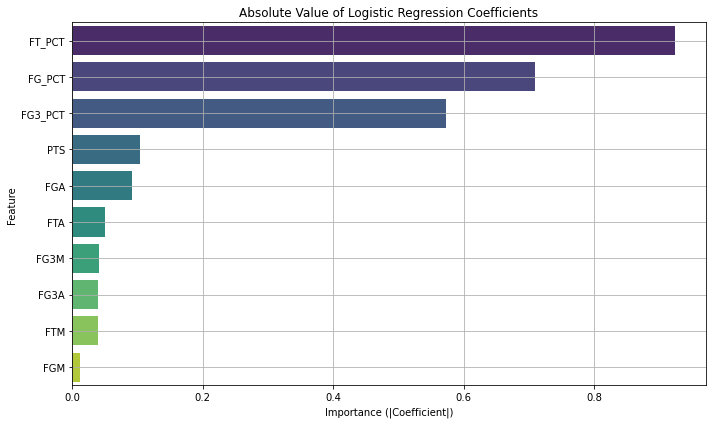

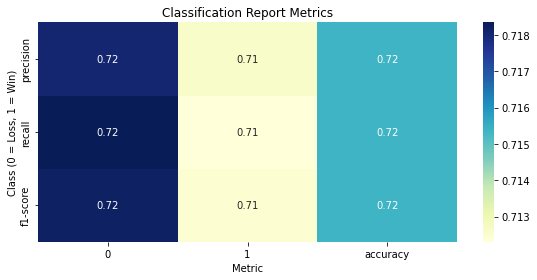

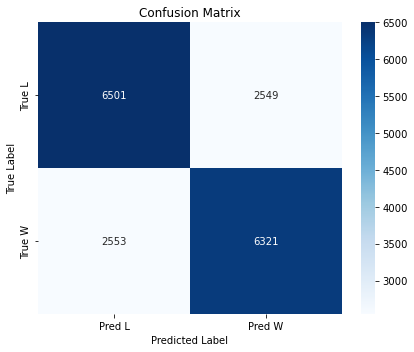

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual 1: Coefficients Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('Absolute Value of Logistic Regression Coefficients')
plt.xlabel('Importance (|Coefficient|)')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual 2: Classification Report as Heatmap
report_df = pd.DataFrame(report).iloc[:-1, :3]  # Exclude accuracy, keep precision, recall, f1
plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Metrics")
plt.ylabel("Class (0 = Loss, 1 = Win)")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()

# Visual 3: Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred L', 'Pred W'], yticklabels=['True L', 'True W'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
